In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
lr = 0.001
training_iters = 20
batch_size = 1000
display_step = 10

n_input = 28
n_step = 28
n_hidden = 256
n_classes = 10

In [3]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print("shape of x_train", x_train.shape)
    print("shape of y_train", y_train.shape)
    print("shape of x_test", x_test.shape)
    print("shape of y_test", y_test.shape)
    number = 60000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    #x_train = x_train.reshape(-1, n_step, n_input)
    #x_test = x_test.reshape(-1, n_step, n_input)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    ## convert class vectors to binary class matrices
    ## y_train and y_test doing one-hot-encoding by np_utils.to_categorial()
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train
    x_test = x_test
    print("converted shape of x_train", x_train.shape)
    print("converted shape of y_train", y_train.shape)
    print("converted shape of x_test", x_test.shape)
    print("converted shape of y_test", y_test.shape)
    
    #normalization
    x_train = x_train / 255
    x_test = x_test /255
    
    ## add noise
    #x_test = np.random.normal(x_test)
    
    return (x_train, y_train), (x_test, y_test)

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)
converted shape of x_train (60000, 28, 28)
converted shape of y_train (60000, 10)
converted shape of x_test (10000, 28, 28)
converted shape of y_test (10000, 10)


In [5]:
model = Sequential()
model.add(LSTM(units=n_hidden, batch_size=(None, n_step, n_input), unroll=True))
#model.add(LSTM(units=n_hidden, input_shape=(n_step, n_input), unroll=True))
#model.add(LSTM(units=n_hidden, batch_input_shape=(batch_size, n_step, n_input), unroll=True))
model.add(Dense(units=n_classes, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=training_iters)

result = model.evaluate(x_train, y_train, batch_size=batch_size)
print ('\nTraining accuracy:', result[1])

result = model.evaluate(x_test, y_test, batch_size=batch_size)
print ('\nTest accuracy:', result[1])

Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 1.2810 - acc: 0.5574
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.3438 - acc: 0.8922
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1881 - acc: 0.9428
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1444 - acc: 0.9560
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1160 - acc: 0.9648
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0951 - acc: 0.9706
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0865 - acc: 0.9729
Epoch 8/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0720 - acc: 0.9776
Epoch 9/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0643 - acc: 0.9797
Epoch 10/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0568 - acc: 0.9820

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
## unit = 128
# 10000 data
# training accuarcy = 0.9934
# testing accuracy = 0.9524

# 30000 data
# training accuarcy = 0.9941
# testing accuracy = 0.9791

# 60000 data, batch_size = 200
# training accuarcy = 0.9965
# testing accuracy = 0.9849
# 60000 data, batch_size = 1000
# training accuarcy = 0.98695
# testing accuracy = 0.9768

## unit = 256
# 60000 data, batch_size = 1000
# training accuarcy = 0.9958
# testing accuracy = 0.9838

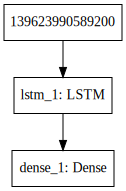

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))